In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv('pollution_2000_2021.csv')

# Preview dataset
df.head(10)

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
5,2000-01-06,2000,1,6,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.014000,0.025,...,9,41.0,6.761905,17.0,7,24.0,39.950000,73.0,8,71
6,2000-01-07,2000,1,7,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.013235,0.024,...,23,40.0,8.666667,21.0,7,30.0,29.625000,43.0,9,41
7,2000-01-08,2000,1,8,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.011176,0.020,...,2,57.0,8.250000,18.0,0,26.0,29.666667,41.0,0,39
8,2000-01-09,2000,1,9,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.012588,0.022,...,2,32.0,6.500000,13.0,19,19.0,25.083333,37.0,20,35
9,2000-01-10,2000,1,10,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.010000,0.015,...,23,42.0,9.958333,21.0,20,30.0,37.666667,70.0,20,68


In [9]:
df_state = df[['Date', 'State', 'O3 AQI', 'CO AQI', 'NO2 AQI', 'SO2 AQI']]
df_state = df_state.groupby(['State', 'Date']).max()

In [10]:
df_state

O3 AQI  CO AQI  NO2 AQI  SO2 AQI
State   Date                                        
Alabama 2013-12-01    24.0     6.0     37.0      1.0
        2013-12-02    11.0     6.0     30.0      3.0
        2013-12-03    11.0     3.0     21.0      3.0
        2013-12-04    13.0     2.0     18.0      1.0
        2013-12-05    13.0     2.0     15.0      1.0
...                    ...     ...      ...      ...
Wyoming 2021-06-26    45.0     1.0      2.0      0.0
        2021-06-27    39.0     1.0      2.0      0.0
        2021-06-28    46.0     1.0      5.0      0.0
        2021-06-29    61.0     1.0      7.0      0.0
        2021-06-30    50.0     1.0      7.0      0.0

[226602 rows x 4 columns]

In [59]:
california = df[df['State']=='California']
california.drop('State', axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
california['Date'] = pd.to_datetime(california['Date'])
california.set_index('Date', inplace=True)
california = california[['O3 AQI', 'CO AQI', 'NO2 AQI', 'SO2 AQI']]

<ipython-input-60-96458e8c3daa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['Date'] = pd.to_datetime(california['Date'])


In [61]:
aqi_monthly = california.resample('MS')
california_monthly = aqi_monthly.max()

<AxesSubplot:xlabel='Date'>

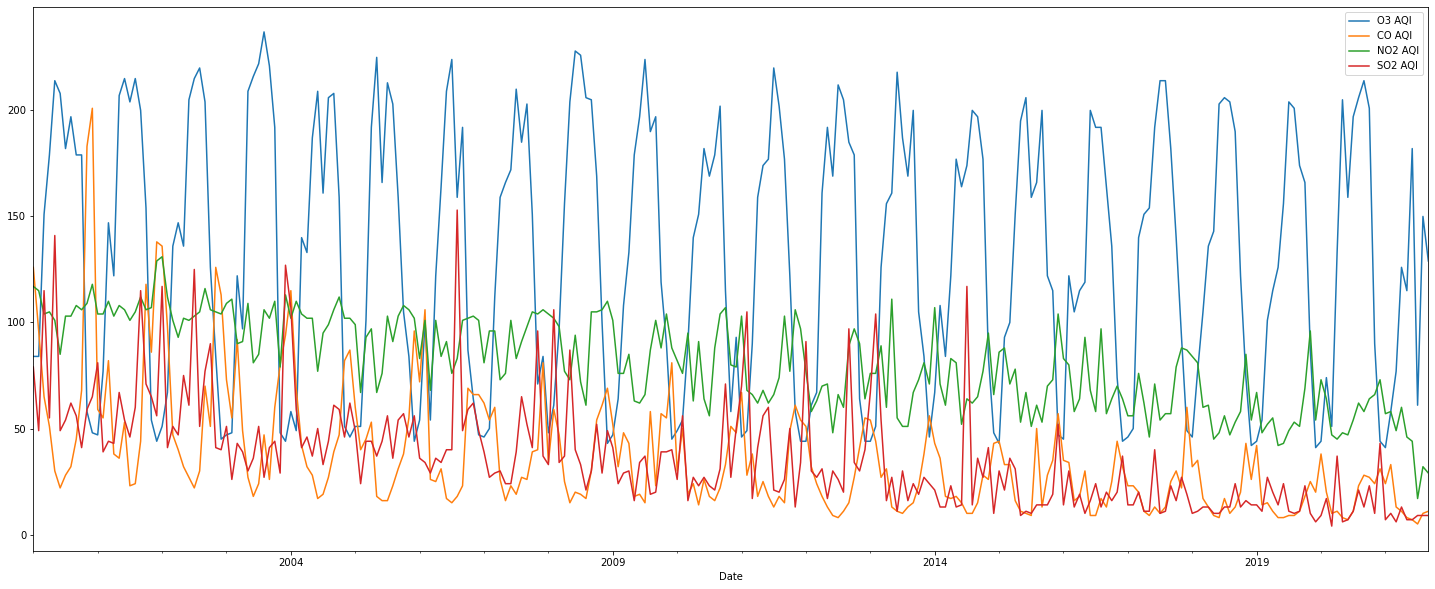

In [69]:
california_monthly.plot(figsize=(25,10))

In [ ]:
for state in list(df['State'].unique):
    state = state
    print(state)

In [74]:
aqi_annual = california.resample('YS')
california_annual = aqi_annual.mean()

<AxesSubplot:xlabel='Date'>

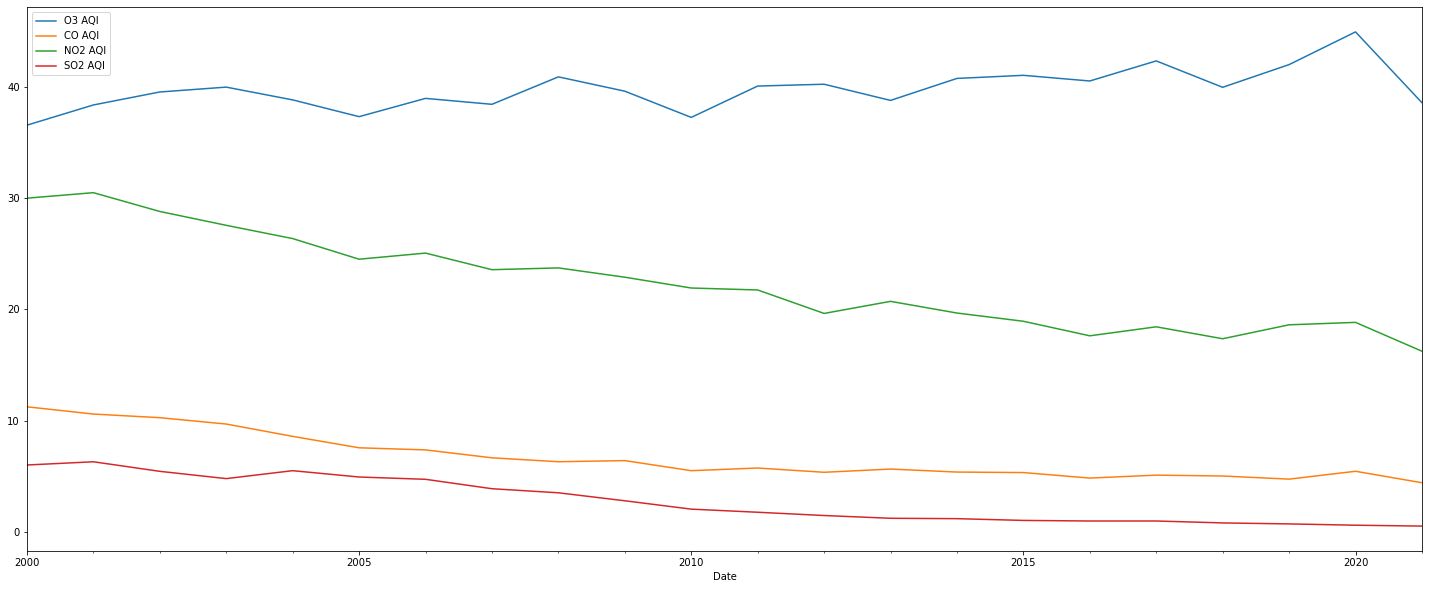

In [75]:
california_annual.plot(figsize=(25,10))